##### [< Forrige](5%20-%20sympy.ipynb)     |     [Neste >](7%20-%20løkker%20og%20simulering.ipynb)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 6 - pandas, filtrering, logikk og betingelser </span>  

# Logikk og betingelser

Noe av det vi gjør oftest når vi programmerer er å teste om en betingelse er sann eller usann. Når testen er utført, kan programmet velge riktig vei å gå i fortsettelsen. Slik testing kalles "logikk". Vi har allerede i innledningen vært inne på variabeltypen som avgjør om en test er sann eller usann, typen `bool`. 

Sann eller usann (`True` og `False`) brukes som oftest sammen med en `if`-betingelse, slik som dette:

#### Eksempel 1:

In [62]:
if False:
    print("Hei")
else:
    print("Hå")

Hå


In [63]:
a = 5

if a < 6:
    print('Tallet er mindre enn 6')
else:
    print('Tallet er større eller lik 6')

Tallet er mindre enn 6


Vanligvis vil `if`-setningen inneholde en test som ikke er helt åpenbar, og som avhenger av input i en funksjon eller en variabel som er definert et annet sted i koden. Her er et eksempel på det første:

#### Eksempel 2:

In [70]:
np.random.rand()

0.3766918808489508

In [73]:
import numpy as np

def did_I_win(s0, s1):
    if s1 > s0:
        return "won!"
    else:
        return "lost" 

PricePaid = 100
StockPriceToday = int(np.random.rand()*200)

print(
    f"Bought for: {PricePaid}\n"
    f"Worth today: {StockPriceToday}\n"
    f"You {did_I_win(PricePaid, StockPriceToday)}"
)

Bought for: 100
Worth today: 51
You lost


Ofte vil du ønske å sammenligne ulike datasett, for eksempel to numpy-rekker. Dersom du skal ha en `if`-betingelse, må du imidlertid huske på at for å få ett svar på en sammenligning mellom to numpy-rekker, så må du angi på hvilken måte de skal sammenlignes. I utgangspunktet vil en slik sammenligning bare gi resultatet fra en sammenligning av hvert element i de to rekkene. Resultatet av sammenligningen er altså ikke en bolsk verdi (`bool`) men en ny rekke. En slik sammenligning vil derfor føre til en feil:

#### Eksempel 3:

In [75]:
a = np.array([1,2,3])
b = np.array([3,2,1])

print(a > b)

if a > b:
    print('a was bigger than b')

[False False  True]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

I stedet må vi angi hvordan den elementvise sammenligningen skal sammenfattes i et sant/usant-resultat. Vi kan da velge mellom å kreve at alle elementene er sanne med numpyfunksjonen `all()`, eller at minst ett av elementene er sanne med `any()`.

#### Eksempel 4:


In [77]:
if np.any(a > b):
    print('There were elements in a where the corresponding element in b was smaller')
    
    
a = np.array([101,102,103])

if np.all(a > b):
    print('All elements in a was bigger than the corresponding element in b')


There were elements in a where the corresponding element in b was smaller
All elements in a was bigger than the corresponding element in b


Ofte vil du ha bruk for å bruke flere vilkår for testen, der du enten krever at alle må være sanne, eller at det holder at én er sann, eller en kombinasjon. Det oppnår vi med `and` og `or`. 

Et annet nyttig nøkkelord for logiske tester er `in`. Dette brukes på alt fra å finne ut om et objekt er i en liste eller annen datastruktur, til om en delstreng er i en streng. Her er et eksempel som bruker alle disse nøkkelordene i `if` og `elif`-setninger:

#### Eksempel 5:

In [79]:
animal = 'bear'

cats = ['lion','tiger','puma','lynx']
mammals = ['human','bear','cat','whale','mouse']+cats

if (animal in cats) and (animal in mammals):
    print(f"{animal} is a cat and a mammal")
elif (not animal in cats) and (animal in mammals):
    print(f"{animal} is not a cat, but it is a mammal")
elif (animal in cats) and (not animal in mammals):
    print(f"{animal} is a cat, but not a mammal")   
else:
    print(f"{animal} is neither a cat nor a mammal")

bear is not a cat, but it is a mammal


Legg merke til `elif` over. De er `if`-setninger som er knyttet til `if`-setningen over. Koden til en `elif`-setning kjøres dersom hverken `if`-setningen eller noen `elif`-setninger over har blitt tilfredsstilt. 

# **Pandas** - et verktøy for behandling og lasting av data
I denne delen skal vi utforske hvordan du kan bruke Pandas til å håndtere data. Vi skal også gå gjennom grunnleggende databehandling, filtrering, aggregering og visualisering.

# 1. Introduksjon til Pandas
Pandas er et kraftig verktøy for datahåndtering og analyse. Det gir deg muligheten til å arbeide med datasett som er representert som DataFrames, en struktur som ligner regneark.

Men først, som alle pakker i Python, må vi laste den inn først.

Først, hvis vi ikke har gjort det, bruker vi ```pip install``` for å laste ned pandas. Det kan gjøres ved å skrive følgende:

```python
        # Laster ned pandas med pip
        !pip install pandas
```

Så må vi importere modulen, at vi "henter" den klar for bruk, ved å kjøre cellen under: 

In [81]:
import pandas as pd

## **Eksempel 6: Importere Pandas og laste inn en CSV-fil**
Det gjør vi ved å skrive følgende:

```python
        # Laste inn en CSV-fil som et DataFrame
        data = pd.read_csv('data/eksempel_data.csv')

        # Vise de første radene i DataFrame
        data.head()
```

MEN! Her er det viktig å huske på at *'data/eksempel_data.csv'* må være *banenavn* til filen du ønsker å lese. Den må være unik for din PC/MAC.

OBS! En del Windows brukere må skrive en ´r´ foran *'data/eksempel_data.csv'*, så prøv det om du får feilmelding.

In [82]:
# Laste inn en CSV-fil som et DataFrame
df = pd.read_csv('/Users/maaas6121/Library/CloudStorage/OneDrive-UiTOffice365/Skrivebord/Bachelor_Emner/SOK-1003/notebooks/data/schooling-gdp.csv') # Din vei til data.

### OBS: FÅR DU FEILMEDLING OVER, SJEKK FILBANEN!!! ###

# Vise de første radene i DataFrame
df.head()

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.680,11.65,4886000
1,Kuwait,KWT,67029.523,6.39,2992000
2,Luxembourg,LUX,57882.809,11.33,508000
3,Switzerland,CHE,55688.020,12.92,7809000
4,United States,USA,49500.629,13.24,309011008


Vi ser at vi har fire variabler: Land, Landkode, BNP_per_capita (BNP per innbygger), Utdanning og Befolkning. BNP er "brutto nasjonalprodukt" som måler hvor mye som produseres i et land i løpet av et år. BNP_per_capita viser altså hvor mye hver person i landet produserer hvert år i gjennomsnitt.  

Import av data til `pandas` gjøres enkelt med funksjonen `read_csv`. Dersom du har lastet ned siste versjon av notebooks, ligger den en fil i mappen "data" som heter schooling-gdp.csv. (kilde: https://ourworldindata.org/grapher/correlation-between-mean-years-of-schooling-and-gdp-per-capita). Denne filen inneholder data på BNP og utdanningsnivå for endel land i 2010.

## **Operasjoner på dataframe's**
Hvis vi antar at vi har kalt *dataframen* (norsk: *dataramme*) for ```data``` (som over). 

Her er en liste av operasjoner vi kan gjøre for å inspisere, endre og bli kjent med data'en vår ved hjelp av Pandas. Denne kan være et fint oppslagsverk for hva dere kan trenge om Pandas. Dokumentasjon om dette finnes også [her](https://pandas.pydata.org/docs/) og over hele Google!

| **Operasjon**                          | **Formål**                                                     | **Syntaks i Python**                                |
|----------------------------------------|----------------------------------------------------------------|-----------------------------------------------------|
| Vise kolonneoverskriftene              | Viser navnene på kolonnene i DataFrame                         | `data.columns`                                      |
| Velge en spesifikk kolonne             | Hente data fra en spesifikk kolonne                            | `data['kolonnenavn']`                               |
| Filtrere rader basert på betingelse     | Filtrere data der en betingelse er oppfylt                     | `data[data['Utdanning'] > 10]`                          |
| Sjekke manglende verdier               | Sjekker om det finnes manglende verdier i datasetet            | `data.isnull().sum()`                               |
| Fylle manglende verdier                | Fyller inn manglende verdier med en gitt verdi                 | `data.fillna(0, inplace=True)`                      |
| Beskrivelse av numeriske verdier        | Gir en statistisk oversikt over numeriske kolonner             | `data.describe()`                                   |
| Sortere data (stigende)                | Sorterer data etter en kolonne i stigende rekkefølge            | `data.sort_values('kolonnenavn', ascending=True)`   |
| Se datatyper                           | Viser datatypene til hver kolonne                              | `data.dtypes`                                       |
| Konvertere datatype                    | Endrer datatype for en spesifikk kolonne                       | `data['kolonne'] = data['kolonne'].astype(float)`   |
| Lese fra Excel-fil                     | Leser data fra en Excel-fil                                    | `data = pd.read_excel('filnavn.xlsx')`              |
| Ny kolonne med beregninger             | Oppretter en ny kolonne som er et resultat av beregninger       | `data['new_column'] = data['kolonne1'] / data['kolonne2']` |
| Finne duplikater                       | Sjekker om det finnes dupliserte rader                         | `data.duplicated()`                                 |
| Fjerne duplikater                      | Fjerner dupliserte rader                                       | `data.drop_duplicates(inplace=True)`                |
| Histogram                              | Lager et histogram for en spesifikk kolonne                    | `data['kolonnenavn'].plot(kind='hist')`             |
| Konvertere til datetime                | Konverterer en kolonne til datetime-objekter                   | `data['dato'] = pd.to_datetime(data['dato'])`       |

... og det er mange, mange fler. Det vil dere få testa dere på gjennom oppgavene. Kommer du over et problem du ikke har sett før, prøv å google det. Lurer du på noe, så har noen lurt på det samme før deg :-)

## Eksempelbruk av operasjoner på dataframe's
Siden vi allerede har kjørt kodeblokken over, har vi variabelen ```df```, som inneholder dataframe'n med data fra 'schooling-gdp.csv'-filen vår.

In [83]:
# 1. Viser kolonneoverskriftene
print(df.columns)

Index(['Land', 'Landkode', 'BNP_per_capita', 'Utdanning', 'Befolkning'], dtype='object')


Her ser i at vi får navn på alle kolonnene i dataframe'n vår. Nyttig inspeksjon!

In [85]:
# 2. Velg en spesifikk kolonne (BNP per capita)
bnp_column = df['BNP_per_capita']
print(bnp_column)

bnp_column[0]

0      73262.68000
1      67029.52300
2      57882.80900
3      55688.02000
4      49500.62900
          ...     
101      972.04572
102      969.23077
103      845.86932
104      786.67023
105      634.97137
Name: BNP_per_capita, Length: 106, dtype: float64


73262.68

Her ser vi verdiene for kolonnen 'BNP_per_capita', vi ser kolonnens 'Name', 'Length' (altså hvor mange tall) og 'dtype' (her har vi et flyttall (float)).

In [86]:
# 3. Filtrer rader basert på en betingelse (land med utdanning > 10 år)
high_education = df[df['Utdanning'] > 10]
print(high_education)

                   Land Landkode  BNP_per_capita  Utdanning  Befolkning
0                Norway      NOR      73262.6800      11.65     4886000
2            Luxembourg      LUX      57882.8090      11.33      508000
3           Switzerland      CHE      55688.0200      12.92     7809000
4         United States      USA      49500.6290      13.24   309011008
5               Ireland      IRL      47823.5040      12.45     4554000
6             Australia      AUS      44854.9020      11.69    22155000
7           Netherlands      NLD      44004.1450      11.71    16683000
8               Denmark      DNK      43416.2230      11.97     5555000
9             Hong Kong      HKG      41687.9490      12.20     6966000
10              Germany      DEU      40627.2300      12.58    80827000
11              Austria      AUT      40489.8090      10.13     8410000
12               Sweden      SWE      40421.9060      11.95     9390000
13               Canada      CAN      40269.0310      12.74    3

Her får vi listet opp alle landene som har at 'Utdanning' er over 10 år.

In [88]:
df

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.68000,11.65,4886000
1,Kuwait,KWT,67029.52300,6.39,2992000
2,Luxembourg,LUX,57882.80900,11.33,508000
3,Switzerland,CHE,55688.02000,12.92,7809000
4,United States,USA,49500.62900,13.24,309011008
...,...,...,...,...,...
101,Malawi,MWI,972.04572,5.01,14540000
102,Mozambique,MOZ,969.23077,2.03,23532000
103,Niger,NER,845.86932,1.95,16464000
104,Liberia,LBR,786.67023,4.35,3891000


In [87]:
# 4. Sjekke om det finnes noen manglende verdier
missing_values = df.isnull().sum()
print(missing_values)

Land              0
Landkode          0
BNP_per_capita    0
Utdanning         0
Befolkning        0
dtype: int64


Denne koden sjekker om det er manglende verdier i datasettet vårt. Her er det '0' i alle kolonnene, som betyr at det er data i alle cellene i dataframe'n, men jobber man med ekte data - trenger det slett ikke være tilfelle.

In [89]:
# 5. Fyll manglende verdier (hvis det var noen) med 0
df.fillna(0, inplace=True)

Koden over vil fulle inn '0' der det er manglende verdier. Men det kan godt tenkes man burde ta gjennomsnitt, median eller en annen verdi her.

In [90]:
# 6. Beskrivelse av numeriske verdier
description = df.describe()
print(description)

       BNP_per_capita   Utdanning    Befolkning
count      106.000000  106.000000  1.060000e+02
mean     17295.935035    8.629434  5.755919e+07
std      16527.233275    2.918427  1.807718e+08
min        634.971370    1.950000  2.820000e+05
25%       4037.425625    6.425000  6.290000e+06
50%      11444.386500    8.745000  1.482050e+07
75%      27165.069000   11.110000  4.025450e+07
max      73262.680000   13.240000  1.368811e+09


Her får vi en beskrivelse av de numeriske verdiene i dataframe'n. 

In [93]:
# 7. Sortere data etter BNP per capita (stigende)
sorted_data = df.sort_values('BNP_per_capita', ascending=True)
print(sorted_data)

                             Land Landkode  BNP_per_capita  Utdanning  \
105  Democratic Republic of Congo      COD       634.97137       3.79   
104                       Liberia      LBR       786.67023       4.35   
103                         Niger      NER       845.86932       1.95   
102                    Mozambique      MOZ       969.23077       2.03   
101                        Malawi      MWI       972.04572       5.01   
..                            ...      ...             ...        ...   
4                   United States      USA     49500.62900      13.24   
3                     Switzerland      CHE     55688.02000      12.92   
2                      Luxembourg      LUX     57882.80900      11.33   
1                          Kuwait      KWT     67029.52300       6.39   
0                          Norway      NOR     73262.68000      11.65   

     Befolkning  
105    64564000  
104     3891000  
103    16464000  
102    23532000  
101    14540000  
..          ...

Her har vi sortert data'en i stigende rekkefølge, basert på variablen 'BNP_per_capita'. Hadde vi satt ```ascending=False```, ville det være i synkende rekkefølge!

In [94]:
# 8. Se datatypene
data_types = df.dtypes
print(data_types)

Land               object
Landkode           object
BNP_per_capita    float64
Utdanning         float64
Befolkning          int64
dtype: object


Her ser vi datatypene til kolonnene våre.

In [95]:
df.head()

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.680,11.65,4886000
1,Kuwait,KWT,67029.523,6.39,2992000
2,Luxembourg,LUX,57882.809,11.33,508000
3,Switzerland,CHE,55688.020,12.92,7809000
4,United States,USA,49500.629,13.24,309011008


In [96]:
# 9. Konvertere en kolonne til en annen datatype (Befolkning til float)
df['Befolkning'] = df['Befolkning'].astype(float)
df['Befolkning']

0        4886000.0
1        2992000.0
2         508000.0
3        7809000.0
4      309011008.0
          ...     
101     14540000.0
102     23532000.0
103     16464000.0
104      3891000.0
105     64564000.0
Name: Befolkning, Length: 106, dtype: float64

Her ser vi at vi gjorde om 'Befolkning' fra heltall ('int64') til flyttall ('float64').

In [97]:
# 10. Ny kolonne som er en funksjon av andre kolonner (BNP total)
df['BNP_total'] = df['BNP_per_capita'] * df['Befolkning']
df

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning,BNP_total
0,Norway,NOR,73262.68000,11.65,4886000.0,3.579615e+11
1,Kuwait,KWT,67029.52300,6.39,2992000.0,2.005523e+11
2,Luxembourg,LUX,57882.80900,11.33,508000.0,2.940447e+10
3,Switzerland,CHE,55688.02000,12.92,7809000.0,4.348677e+11
4,United States,USA,49500.62900,13.24,309011008.0,1.529624e+13
...,...,...,...,...,...,...
101,Malawi,MWI,972.04572,5.01,14540000.0,1.413354e+10
102,Mozambique,MOZ,969.23077,2.03,23532000.0,2.280794e+10
103,Niger,NER,845.86932,1.95,16464000.0,1.392639e+10
104,Liberia,LBR,786.67023,4.35,3891000.0,3.060934e+09


Her lager vi en ny kolonner, som en funksjon av de to andre kolonnene, BNP og Befolkning.

In [100]:
# 11. Finne dupliserte rader
duplicates = df.duplicated()
print(duplicates)

print(f'Det er {sum(duplicates)} duplikater i vårt datasett!')

0      False
1      False
2      False
3      False
4      False
       ...  
101    False
102    False
103    False
104    False
105    False
Length: 106, dtype: bool
Det er 0 duplikater i vårt datasett!


Her leter vi etter duplikater i data'en vår. Her ser alt ut til å være 'False' --> altså, ingen duplikater.

Legg merke til at ```print(duplicates)``` viser 'False' for de første fem, og de siste 5 radene i dataframe'n. Men vanskelig å si noe om de mellom indeks 4 og indeks 101.

Derfor har jeg skrevet ```print(sum(duplicates))```, for vi husker fra tidligere forelesning. Så behandles 'False' som tallet $0$ og 'True' som tallet $1$.

In [101]:
# 12. Fjerne duplikater
df.drop_duplicates(inplace=True)

Hadde vi hatt duplikater (noe vi ikke har her), hadde vi nå fjernet dem! :-) 

<Axes: ylabel='Frequency'>

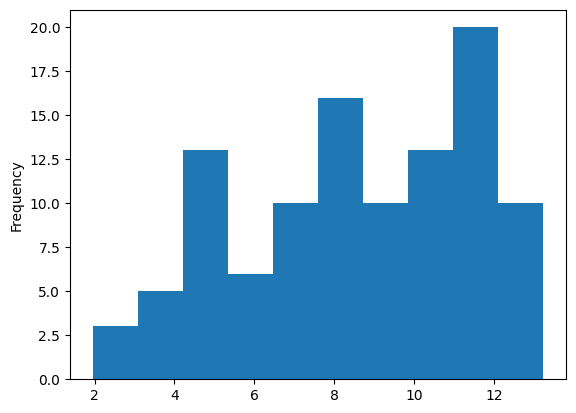

In [102]:
# 13. Plot et histogram over utdanningsnivå
df['Utdanning'].plot(kind='hist')

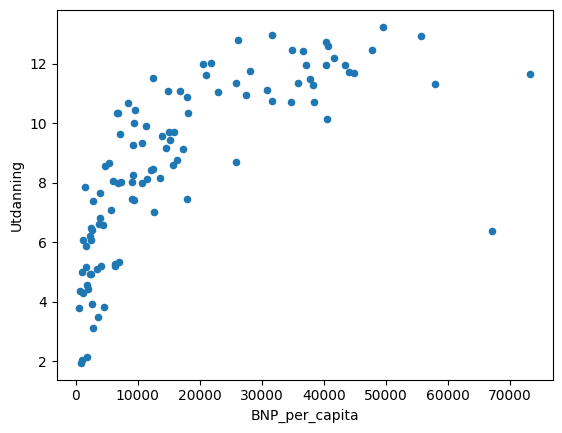

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/maaas6121/Library/CloudStorage/OneDrive-UiTOffice365/Skrivebord/Bachelor_Emner/SOK-1003/notebooks/data/schooling-gdp.csv') # Din vei til data.
df.plot.scatter('BNP_per_capita','Utdanning')
plt.show()

# For-løkker i Python

For-løkker er en viktig del av programmering som lar deg iterere over en sekvens (for eksempel en liste eller et intervall). I økonomi kan for-løkker være nyttige for å beregne totalverdier, avgifter, eller for å analysere datasett.

## Syntaks

```python
for element in sekvens:
    # Kodeblokk som kjøres for hvert element
```

En for-løkke består altså av følgende;

| Komponent    | Beskrivelse                                                     | Eksempel                       |
|--------------|---------------------------------------------------------------|-------------------------------|
| **for**      | Starten av løkken.                                            | `for i in range(10):`        |
| **Element**  | Variabelen som tar verdien til hvert element i sekvensen.    | `i`                           |
| **Sekvens**  | Listen, området, eller annen itererbar datatype.              | `range(10)`, `list`          |
| **Kodeblokk**    | Koden som utføres for hvert element i sekvensen.              | `print(i)`                   |

In [105]:
liste = [1, 5, 7, 19, 25]

for b in liste:
    print(b)

1
5
7
19
25


Vi ser at sammenhengen virker mer usikker for når utdanningsnivået og BNP per capita er høyt. Vi kan derfor bruke en `if`-setning til å kun ta med land med høyt BNP per capita eller høyt utdanningsnivå. Vi ønsker også å kun se på andre land en Norge. Da kan vi for eksempel kjøre denne koden:

#### Eksempel 7:

In [113]:
df

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.68000,11.65,4886000
1,Kuwait,KWT,67029.52300,6.39,2992000
2,Luxembourg,LUX,57882.80900,11.33,508000
3,Switzerland,CHE,55688.02000,12.92,7809000
4,United States,USA,49500.62900,13.24,309011008
...,...,...,...,...,...
101,Malawi,MWI,972.04572,5.01,14540000
102,Mozambique,MOZ,969.23077,2.03,23532000
103,Niger,NER,845.86932,1.95,16464000
104,Liberia,LBR,786.67023,4.35,3891000


In [114]:
df.iloc[3]

Land              Switzerland
Landkode                  CHE
BNP_per_capita       55688.02
Utdanning               12.92
Befolkning            7809000
Name: 3, dtype: object

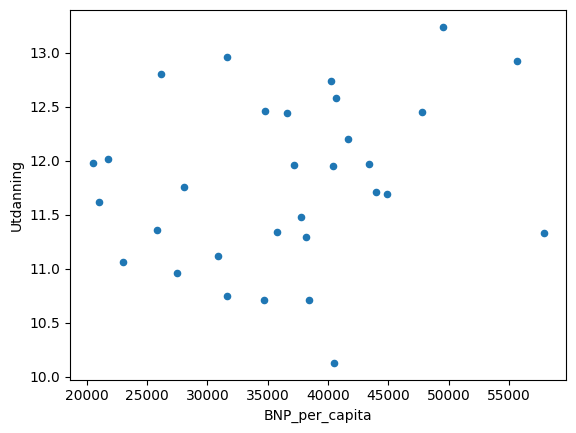

In [116]:
# Lager en tom liste
index_list = []

for index, (country,code,gdp_cap,edu,pop) in df.iterrows():
    if (gdp_cap>20000 and country != 'Norway') and edu > 10:
        index_list.append(index)
    
index_list

df_filtered = df[df.index.isin(index_list)]

df_filtered.plot.scatter('BNP_per_capita','Utdanning')

plt.show()

Her lager vi en liste, og legger til indeksen til hvert element i datarammen `df` som skal inkluderes. Vi velger så ut radene i datarammen med disse indeksene med `dataframe`-funksjonen `isin()`. Funksjonens navn kommer fra *is in*, så den tester altså om index_list er i datarammen `df`. Som vi ser, ser det ut til å være er det liten sammenheng mellom BNP per capita og utdanningsnivå for disse observasjonene. 

#### Tips:
Vi kan også gjøre filtreringer direkte når vi viser dataene, men da må vi bruke "bitvis" sammenligning. Her er `and` lik `&` og `or` lik `|`

<Axes: xlabel='BNP_per_capita', ylabel='Utdanning'>

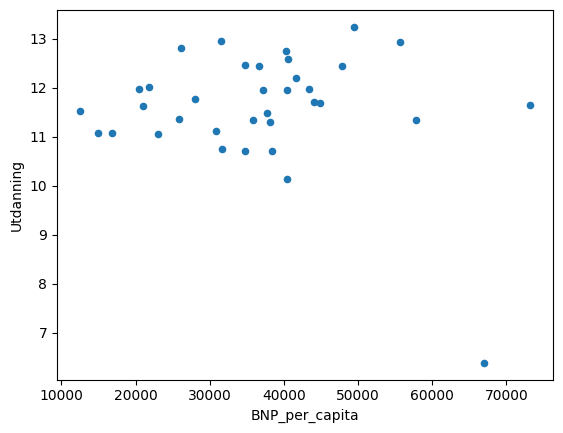

In [117]:
df[((df["Utdanning"]>11) | (df["BNP_per_capita"]>30000))].plot.scatter("BNP_per_capita", "Utdanning")

## SeaBorn - bygge på matplotlib
Seaborn er et kraftig Python-bibliotek for visualiseringer bygget på toppen av Matplotlib. Det er spesielt designet for å håndtere statistiske grafer og integrerer godt med Pandas og Numpy, som gjør det enklere å lage komplekse visualiseringer med få linjer kode.

### Heatmap - korrelasjon mellom numeriske variabler

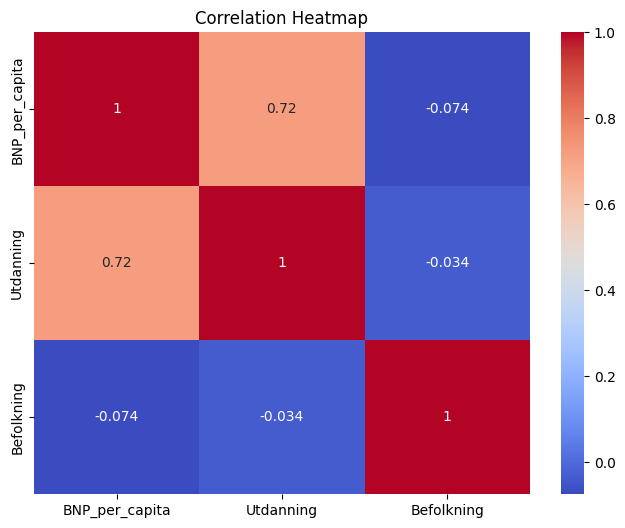

In [118]:
import numpy as np 
import seaborn as sns

# Filtrere ut kun numeriske kolonner
df_numeric = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Forklaring av Heatmap:

1. **Korrelasjon:**
   Et korrelasjonsheatmap viser sammenhengen mellom numeriske variabler i datasettet ditt. Korrelasjon måler hvor sterkt to variabler henger sammen, og verdiene spenner fra -1 til 1:
   
   - **1:** Perfekt positiv korrelasjon (når en variabel øker, øker også den andre).
   - **0:** Ingen korrelasjon (ingen lineær sammenheng mellom variablene).
   - **-1:** Perfekt negativ korrelasjon (når en variabel øker, synker den andre).

2. **Heatmap-fargene:**
   Fargene i heatmap'et representerer korrelasjonsverdiene:
   
   - **Røde områder:** Indikerer en negativ korrelasjon (mørkere rødfarge betyr sterkere negativ korrelasjon).
   - **Blå områder:** Indikerer en positiv korrelasjon (jo mørkere blå, jo sterkere positiv korrelasjon).
   - **Hvite områder:** Indikerer korrelasjoner nær null, altså liten eller ingen lineær sammenheng mellom variablene.

3. **Diagonal:**
   På diagonalen i heatmap’et vil du se verdien 1 fordi hver variabel er perfekt korrelert med seg selv.

### Hvordan tolke heatmap’et:
- **Styrken på sammenhengen:** Du ser på hvor nær korrelasjonen er 1 (positiv sammenheng) eller -1 (negativ sammenheng).
- **Mønster:** Du kan identifisere grupper av variabler som er sterkt korrelert med hverandre, noe som kan være nyttig i analysen. For eksempel, hvis flere variabler er sterkt korrelert, kan det indikere at de påvirkes av lignende faktorer.

### Eksempel:
Hvis du har et datasett med variabler som `BNP_per_capita`, `Utdanning`, og `Befolkning`, kan heatmap’et over vise at høyere utdanningsnivå er knyttet til høyere BNP per innbygger. Det ser vi fordi `BNP_per_capita` og `Utdanning` har en korrelasjon på 0.72, noe som betyr det at disse to variablene har en sterk positiv lineær sammenheng.

## Oppgaver:
I statistikk-kurs, så brukes ofte et datasett kalt 'iris' for å lære seg databehandling. Det ble brukt av den britiske statistikeren og biologen Ronald Fisher. Selv om det ikke er et økonomisk datasett, skal vi se på det i oppgavene her.

### Oppgave 1 - Grunnleggende utforskning av Iris-datasettet
1. Last inn filen med å kjøre følgende kode:
```python
        iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
```
Skriv ut de første fem radene.

2. Finn ut hvor mange rader og kolonner datasettet har.
3. Sjekk om datasettet inneholder manglende verdier.
4. Beregn gjennomsnittet for hver kolonne som inneholder numeriske verdier.

In [119]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Oppgave 3 - Plotting med matplotlib og Seaborn

1. Lag et histogram for fordelingen av sepal_length.
2. Lag et heatmap (med Seaborn) som viser korrelasjonene mellom de numeriske variablene i datasettet. Beskriv hva du ser!

### Oppgave 4 - Avanserte Pandas-operasjoner
1. Gruppér datasettet etter art (species) og beregn gjennomsnittet for hver av de numeriske kolonnene for hver art.
2. Sorter datasettet etter petal_length i synkende rekkefølge.
3. Bruk apply-funksjonen til å lage en ny kolonne som inneholder lengden på species-navnet.

##### [< Forrige](5%20-%20sympy.ipynb)     |     [Neste >](7%20-%20løkker%20og%20simulering.ipynb)